# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_green.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities[0:5]

['busselton', 'cap malheureux', 'sentyabrskiy', 'znamenskoye', 'bodaybo']

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2b6be0a3373ddc129ded8e4435cd8eae&units=imperial&q='

In [5]:
# set up lists to hold response info
lats = []
longs = []
temps = []
winds = []
cloudinesses = []
pressures = []
humiditys = []
countries = []
dates = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city)
    
    if response.status_code == 200:    
        data = response.json()
        
#         try:
        # Extraced all data points before appending (don't append twice)
        lat = data["coord"].get("lat")
        long = data["coord"].get("lon")
        temp = data["main"].get("temp")
        wind = data["wind"].get("speed")
        cloudiness = data["clouds"].get("all")
        pressure = data["main"].get("pressure")
        humidity = data["main"].get("humidity")
        country = data["sys"].get("country")
        date = data.get("dt")
      
        #append to lists
        lats.append(lat)
        longs.append(long)
        temps.append(temp)
        pressures.append(pressure)
        humiditys.append(humidity)
        winds.append(wind)
        cloudinesses.append(cloudiness)
        countries.append(country)
        dates.append(date)
#         except:
#             # We failed to extract all data points 
#             lats.append(np.nan)
#             longs.append(np.nan)
#             temps.append(np.nan)
#             winds.append(np.nan)
#             pressures.append(np.nan)
#             humiditys.append(np.nan)
#             countries.append("")
#             dates.append(np.nan)
        
    else: 
        # appends nan to dataframe
        lats.append(np.nan)
        longs.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        cloudinesses.append(np.nan)
        pressures.append(np.nan)
        humiditys.append(np.nan)
        countries.append("")
        dates.append(np.nan)
    
    # print cities and avoid rate limits
    print(city)
    time.sleep(1)

busselton
cap malheureux
sentyabrskiy
znamenskoye
bodaybo
new norfolk
prince rupert
boa vista
bonnybridge
el vendrell
punta arenas
adrar
taoudenni
ribeira grande
kieta
chuy
georgetown
mataura
puerto ayora
magan
riyadh
upernavik
port alfred
pangai
dingle
hilo
klyuchi
dikson
rio cuarto
thompson
rikitea
luderitz
illoqqortoormiut
mwinilunga
hobyo
pevek
ushuaia
vaini
longyearbyen
tuktoyaktuk
bredasdorp
mar del plata
richards bay
salekhard
kijang
ixtapa
zwedru
tripoli
anadyr
metro
kansanshi
butaritari
kavaratti
taolanaro
bambous virieux
kholmogory
provideniya
hermanus
camacha
palabuhanratu
sorvag
acarau
kodiak
chokurdakh
simbahan
lebu
jamestown
nikolskoye
aksu
hay river
cabo san lucas
jacqueville
nieuw amsterdam
ponta do sol
sechura
sabang
eureka
carnarvon
tsihombe
hobart
pangnirtung
najran
norman wells
brunswick
barrow
gogrial
gamba
qaanaaq
samarai
torbay
bobcaygeon
saint-philippe
komsomolskiy
bulgan
bluff
atuona
iqaluit
vila franca do campo
warqla
bengkulu
sungaipenuh
bojnurd
hudson bay
zw

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = pd.DataFrame()

weather_data["City"] = cities
weather_data["Country"] = countries
weather_data["Latitude"] = lats
weather_data["Longitude"] = longs
weather_data["Temp"] = temps
weather_data["Wind"] = winds
weather_data["Cloudiness"] = cloudinesses
weather_data["Pressure"] = pressures
weather_data["Humidity"] = humiditys
weather_data["Date"] = dates
weather_data["Date"] =pd.to_datetime(weather_data["Date"], unit='s')

In [7]:
weather_data.head(50)

,City,Country,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity,Date
0,busselton,AU,-33.6500,115.3333,61.05,8.14,89.0,1023.0,69.0,2021-08-13 04:27:07
1,cap malheureux,MU,-19.9842,57.6142,74.46,10.00,9.0,1022.0,78.0,2021-08-13 04:27:08
2,sentyabrskiy,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,znamenskoye,RU,57.1281,73.8282,58.41,10.20,76.0,1021.0,59.0,2021-08-13 04:27:11
4,bodaybo,RU,57.8506,114.1933,80.08,2.46,55.0,1009.0,54.0,2021-08-13 04:27:12
5,new norfolk,AU,-42.7826,147.0587,51.91,5.99,95.0,1010.0,65.0,2021-08-13 04:27:13
6,prince rupert,CA,54.3161,-130.3201,62.38,2.30,1.0,1021.0,85.0,2021-08-13 04:27:15
7,boa vista,BR,2.8197,-60.6733,75.18,5.75,75.0,1014.0,88.0,2021-08-13 04:17:48
8,bonnybridge,GB,56.0015,-3.8886,55.20,9.71,29.0,1010.0,91.0,2021-08-13 04:27:17
9,el vendrell,ES,41.2167,1.5333,73.96,3.98,3.0,1020.0,56.0,2021-08-13 04:27:19


In [8]:
weather_data.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
mask = weather_data.Humidity > 100
weather_data.loc[mask]

,City,Country,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

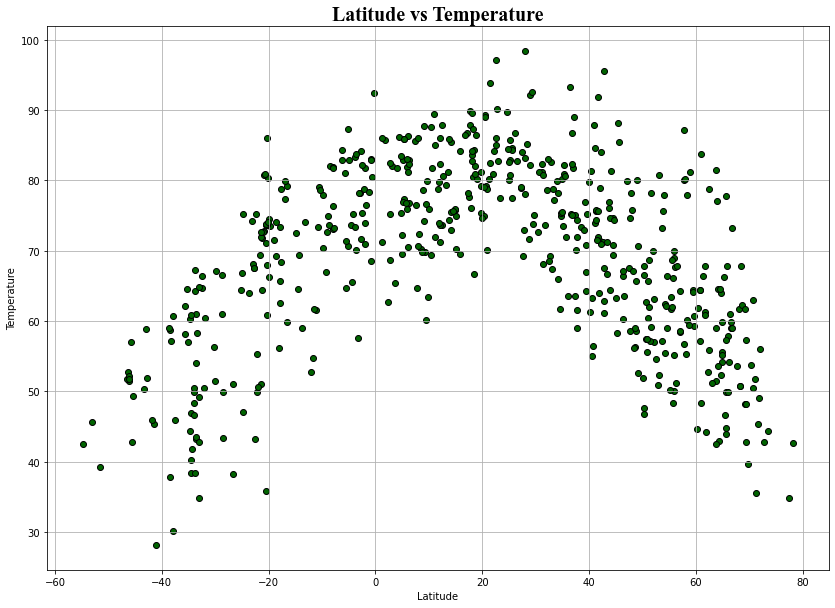

In [12]:
plt.figure(figsize = (14,10))
plt.scatter(weather_data.Latitude, weather_data.Temp, color="darkgreen", edgecolor="black")
plt.title ("Latitude vs Temperature", fontweight="bold", fontsize=20, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

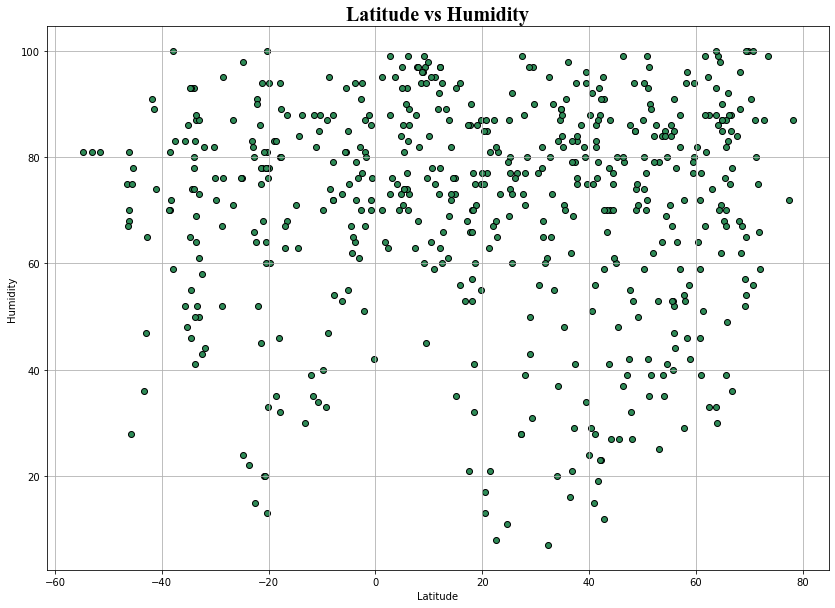

In [13]:
plt.figure(figsize = (14,10))
plt.scatter(weather_data.Latitude, weather_data.Humidity, color="seagreen", edgecolor="black")
plt.title ("Latitude vs Humidity", fontweight="bold", fontsize=20, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

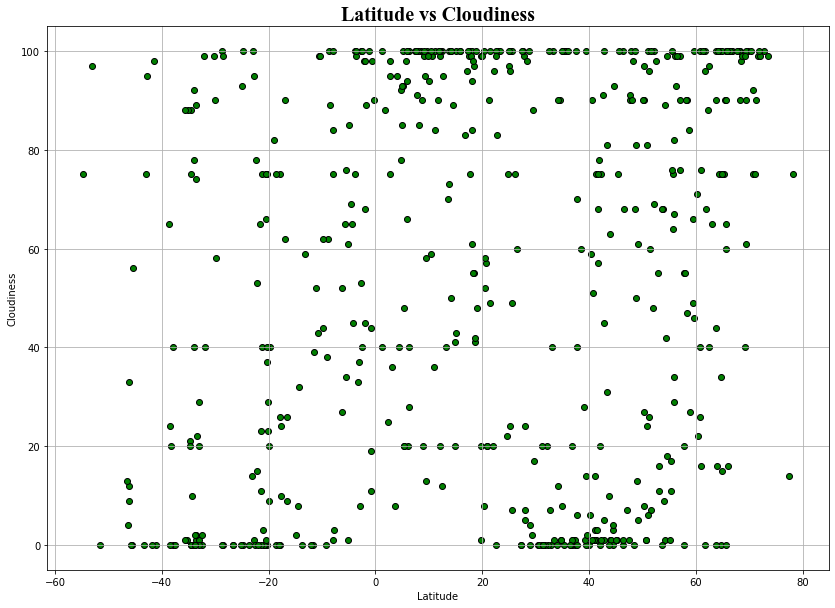

In [14]:
plt.figure(figsize = (14,10))
plt.scatter(weather_data.Latitude, weather_data.Cloudiness, color="green", edgecolor="black")
plt.title ("Latitude vs Cloudiness", fontweight="bold", fontsize=20, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

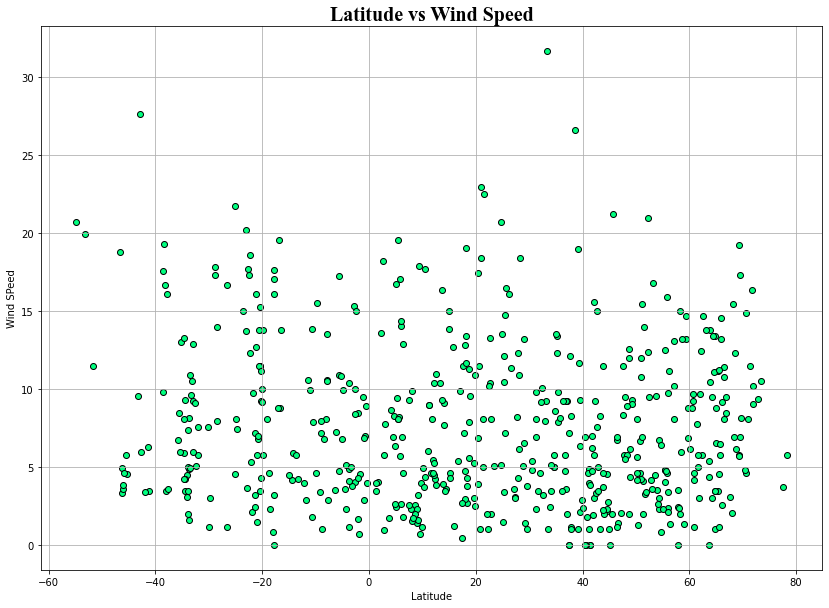

In [15]:
plt.figure(figsize = (14,10))
plt.scatter(weather_data.Latitude, weather_data.Wind, color="springgreen", edgecolor="black")
plt.title ("Latitude vs Wind Speed", fontweight="bold", fontsize=20, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Wind SPeed")
plt.grid()
plt.show

## Linear Regression

In [16]:
# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as st
import seaborn as sns

In [17]:
df_northern = weather_data.loc[weather_data.Latitude >= 0].reset_index(drop=True)
df_northern.head()

,City,Country,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity,Date
0,znamenskoye,RU,57.1281,73.8282,58.41,10.20,76.0,1021.0,59.0,2021-08-13 04:27:11
1,bodaybo,RU,57.8506,114.1933,80.08,2.46,55.0,1009.0,54.0,2021-08-13 04:27:12
2,prince rupert,CA,54.3161,-130.3201,62.38,2.30,1.0,1021.0,85.0,2021-08-13 04:27:15
3,boa vista,BR,2.8197,-60.6733,75.18,5.75,75.0,1014.0,88.0,2021-08-13 04:17:48
4,bonnybridge,GB,56.0015,-3.8886,55.20,9.71,29.0,1010.0,91.0,2021-08-13 04:27:17


In [18]:
df_northern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        388 non-null    object        
 1   Country     388 non-null    object        
 2   Latitude    388 non-null    float64       
 3   Longitude   388 non-null    float64       
 4   Temp        388 non-null    float64       
 5   Wind        388 non-null    float64       
 6   Cloudiness  388 non-null    float64       
 7   Pressure    388 non-null    float64       
 8   Humidity    388 non-null    float64       
 9   Date        388 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 30.4+ KB


In [19]:
df_northern.describe()

,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,37.951179,15.784490,70.810129,7.220412,59.010309,1012.425258,70.945876
std,20.515187,87.440613,12.466291,5.106142,39.289292,5.266253,21.178329
min,1.237600,-173.300000,34.880000,0.000000,0.000000,991.000000,7.000000
25%,19.744925,-68.328650,61.715000,3.430000,17.750000,1009.000000,60.000000
50%,39.543850,24.174400,72.990000,5.750000,72.000000,1012.000000,75.500000
75%,55.526450,90.512650,80.805000,10.170000,99.000000,1016.000000,87.000000
max,78.218600,179.316700,98.420000,31.650000,100.000000,1027.000000,100.000000


In [20]:
df_southern = weather_data.loc[weather_data.Latitude < 0].reset_index(drop=True)
df_southern.head()

,City,Country,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity,Date
0,busselton,AU,-33.6500,115.3333,61.05,8.14,89.0,1023.0,69.0,2021-08-13 04:27:07
1,cap malheureux,MU,-19.9842,57.6142,74.46,10.00,9.0,1022.0,78.0,2021-08-13 04:27:08
2,new norfolk,AU,-42.7826,147.0587,51.91,5.99,95.0,1010.0,65.0,2021-08-13 04:27:13
3,punta arenas,CL,-53.1500,-70.9167,45.70,19.91,97.0,1000.0,81.0,2021-08-13 04:27:20
4,kieta,PG,-6.2167,155.6333,82.90,7.27,52.0,1010.0,73.0,2021-08-13 04:25:55


In [21]:
df_southern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        171 non-null    object        
 1   Country     171 non-null    object        
 2   Latitude    171 non-null    float64       
 3   Longitude   171 non-null    float64       
 4   Temp        171 non-null    float64       
 5   Wind        171 non-null    float64       
 6   Cloudiness  171 non-null    float64       
 7   Pressure    171 non-null    float64       
 8   Humidity    171 non-null    float64       
 9   Date        171 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 13.5+ KB


In [22]:
df_southern.describe()

,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,-21.910436,30.289577,64.002456,8.342515,41.263158,1018.783626,69.929825
std,13.717050,97.048054,13.782121,5.354370,37.308977,7.534624,19.165404
min,-54.800000,-175.200000,28.150000,0.000000,0.000000,994.000000,13.000000
25%,-33.673550,-55.287200,52.070000,4.205000,1.000000,1013.000000,61.000000
50%,-20.896800,25.850000,66.470000,7.180000,37.000000,1018.000000,75.000000
75%,-9.500000,128.329600,74.075000,11.320000,75.000000,1024.000000,83.000000
max,-0.316700,175.515300,92.370000,27.630000,100.000000,1036.000000,100.000000


In [23]:
n_corr = df_northern.corr()
n_corr

,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity
Latitude,1.000000,-0.024862,-0.675546,0.007710,-0.047915,0.011932,-0.075070
Longitude,-0.024862,1.000000,0.238954,0.170818,0.205125,-0.364798,-0.219797
Temp,-0.675546,0.238954,1.000000,0.035791,-0.131670,-0.214178,-0.398734
Wind,0.007710,0.170818,0.035791,1.000000,0.172771,-0.098058,-0.003285
Cloudiness,-0.047915,0.205125,-0.131670,0.172771,1.000000,-0.264305,0.349490
Pressure,0.011932,-0.364798,-0.214178,-0.098058,-0.264305,1.000000,0.112133
Humidity,-0.075070,-0.219797,-0.398734,-0.003285,0.349490,0.112133,1.000000


In [24]:
s_corr = df_southern.corr()
s_corr

,Latitude,Longitude,Temp,Wind,Cloudiness,Pressure,Humidity
Latitude,1.000000,-0.088546,0.740331,-0.150255,0.263576,-0.361897,0.018199
Longitude,-0.088546,1.000000,0.237025,0.038650,0.163609,-0.104864,-0.244148
Temp,0.740331,0.237025,1.000000,0.062762,0.319584,-0.496410,-0.172458
Wind,-0.150255,0.038650,0.062762,1.000000,0.198251,-0.066129,-0.013061
Cloudiness,0.263576,0.163609,0.319584,0.198251,1.000000,-0.269233,0.276102
Pressure,-0.361897,-0.104864,-0.496410,-0.066129,-0.269233,1.000000,0.068411
Humidity,0.018199,-0.244148,-0.172458,-0.013061,0.276102,0.068411,1.000000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
feature1= df_northern["Latitude"]
target1 = df_northern["Temp"]

# STATSMODELS
X = sm.add_constant(feature1)
Y = target1
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     324.0
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           4.92e-53
Time:                        23:42:09   Log-Likelihood:                -1410.7
No. Observations:                 388   AIC:                             2825.
Df Residuals:                     386   BIC:                             2833.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.3892      0.984     87.836      0.000      84.455      88.323
Latitude      -0.4105      0.023    -18.001      0.000      -0.455      -0.366
==============================================================================
Omnibus:                        1.391   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.452
Skew:                           0.141   Prob(JB):                        0.484
Kurtosis:                       2.900   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

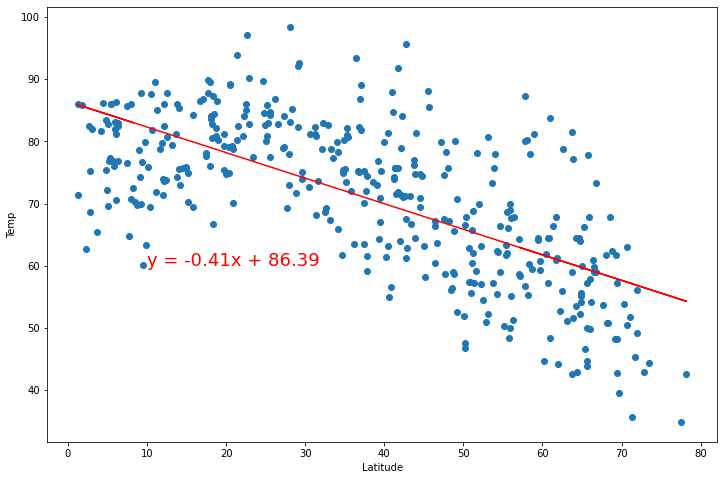

In [42]:
# Add the linear regression equation and line to plot
x_values =  feature1
y_values = target1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
feature2 = df_southern["Latitude"]
target2 = df_southern["Temp"]

# STATSMODELS
X = sm.add_constant(feature2)
Y = target2
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           5.86e-31
Time:                        23:42:20   Log-Likelihood:                -622.82
No. Observations:                 171   AIC:                             1250.
Df Residuals:                     169   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.3004      1.342     59.838      0.000      77.651      82.950
Latitude       0.7438      0.052     14.317      0.000       0.641       0.846
==============================================================================
Omnibus:                       10.946   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.888
Skew:                          -0.644   Prob(JB):                      0.00262
Kurtosis:                       2.893   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

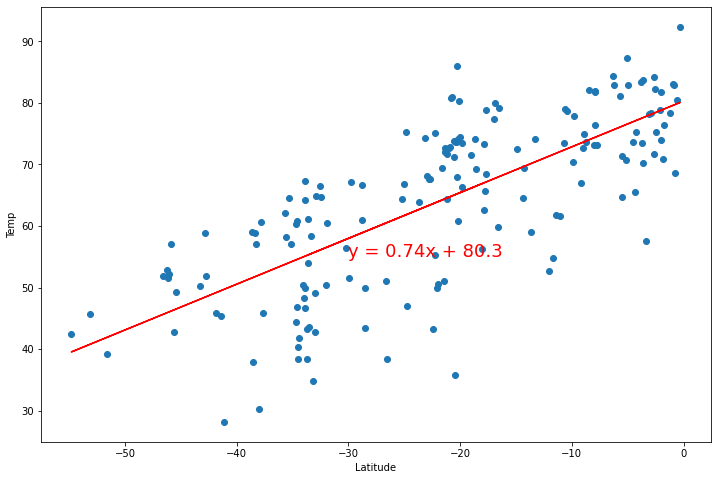

In [45]:
# Add the linear regression equation and line to plot
x_values =  feature2
y_values = target2

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [30]:
feature3 = df_northern["Latitude"]
target3 = df_northern["Humidity"]

# STATSMODELS
X = sm.add_constant(feature3)
Y = target3
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.188
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.140
Time:                        23:42:20   Log-Likelihood:                -1733.5
No. Observations:                 388   AIC:                             3471.
Df Residuals:                     386   BIC:                             3479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.8870      2.260     32.697      0.000      69.444      78.330
Latitude      -0.0775      0.052     -1.479      0.140      -0.181       0.026
==============================================================================
Omnibus:                       46.345   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.962
Skew:                          -0.950   Prob(JB):                     9.54e-14
Kurtosis:                       3.314   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

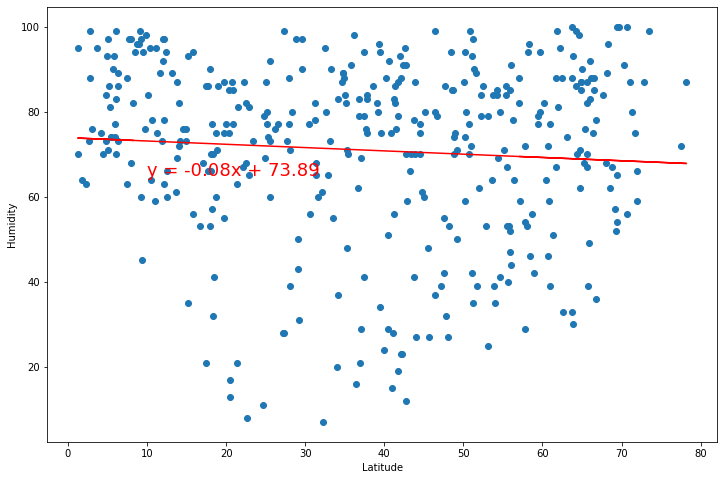

In [31]:
# Add the linear regression equation and line to plot
x_values =  feature3
y_values = target3

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,65),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [32]:
feature4 = df_southern["Latitude"]
target4 = df_southern["Humidity"]

# STATSMODELS
X = sm.add_constant(feature4)
Y = target4
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.05599
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.813
Time:                        23:42:20   Log-Likelihood:                -747.09
No. Observations:                 171   AIC:                             1498.
Df Residuals:                     169   BIC:                             1504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4869      2.776     25.396      0.000      65.008      75.966
Latitude       0.0254      0.107      0.237      0.813      -0.187       0.238
==============================================================================
Omnibus:                       21.786   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.271
Skew:                          -0.948   Prob(JB):                     1.97e-06
Kurtosis:                       3.309   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

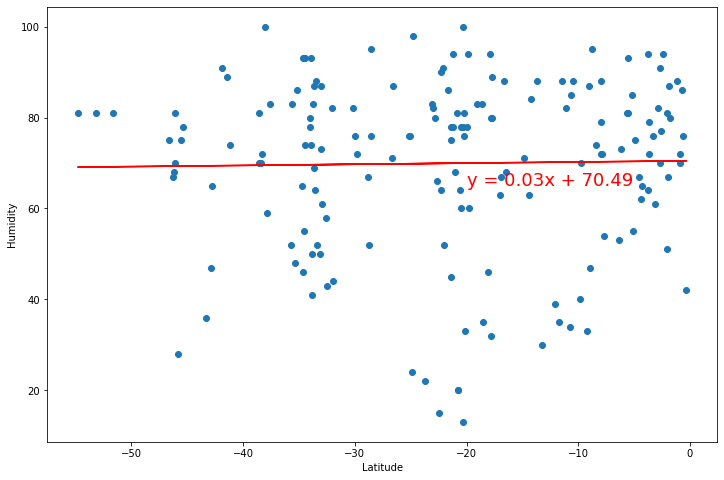

In [33]:
# Add the linear regression equation and line to plot
x_values =  feature4
y_values = target4

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,65),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [34]:
feature5 = df_northern["Latitude"]
target5 = df_northern["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature5)
Y = target5
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8883
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.347
Time:                        23:42:21   Log-Likelihood:                -1973.9
No. Observations:                 388   AIC:                             3952.
Df Residuals:                     386   BIC:                             3960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4929      4.199     14.882      0.000      54.237      70.749
Latitude      -0.0918      0.097     -0.942      0.347      -0.283       0.100
==============================================================================
Omnibus:                     3508.800   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.905
Skew:                          -0.362   Prob(JB):                     1.08e-10
Kurtosis:                       1.479   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

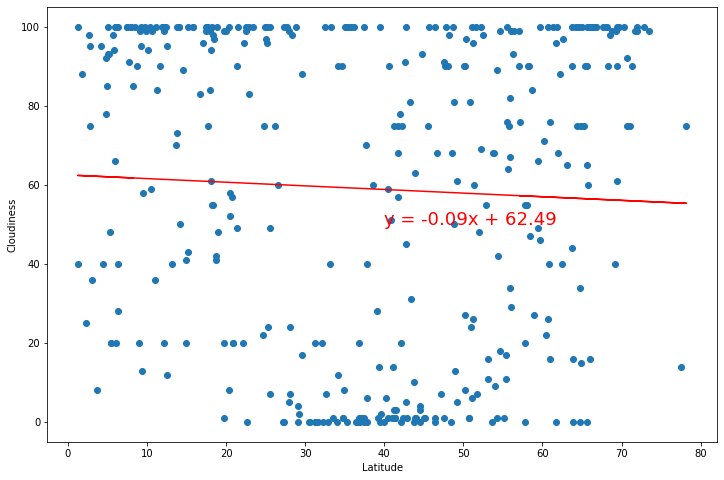

In [46]:
# Add the linear regression equation and line to plot
x_values =  feature5
y_values = target5

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [36]:
feature6 = df_southern["Latitude"]
target6 = df_southern["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature6)
Y = target6
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     12.62
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           0.000495
Time:                        23:42:21   Log-Likelihood:                -854.87
No. Observations:                 171   AIC:                             1714.
Df Residuals:                     169   BIC:                             1720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9707      5.213     10.929      0.000      46.680      67.261
Latitude       0.7169      0.202      3.552      0.000       0.318       1.115
==============================================================================
Omnibus:                       81.916   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.664
Skew:                           0.386   Prob(JB):                     0.000654
Kurtosis:                       1.791   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

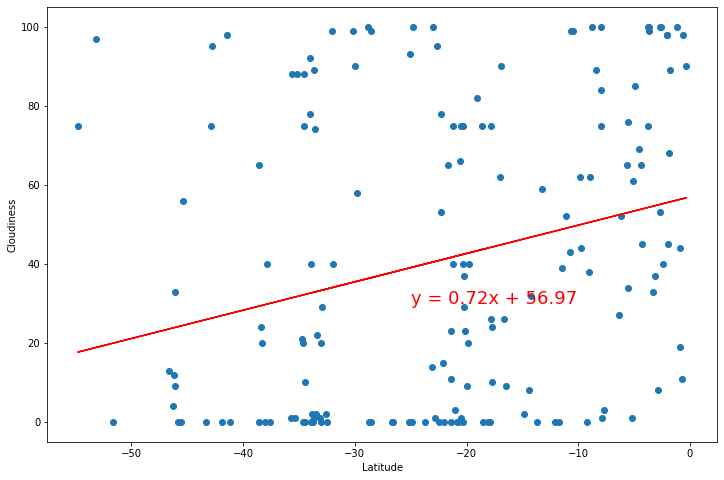

In [48]:
x_values =  feature6
y_values = target6

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [38]:
feature7 = df_northern["Latitude"]
target7 = df_northern["Wind"]

# STATSMODELS
X = sm.add_constant(feature7)
Y = target7
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wind   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.02295
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.880
Time:                        23:42:21   Log-Likelihood:                -1182.6
No. Observations:                 388   AIC:                             2369.
Df Residuals:                     386   BIC:                             2377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1476      0.546     13.082      0.000       6.073       8.222
Latitude       0.0019      0.013      0.151      0.880      -0.023       0.027
==============================================================================
Omnibus:                       65.908   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.833
Skew:                           1.053   Prob(JB):                     7.71e-23
Kurtosis:                       4.364   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

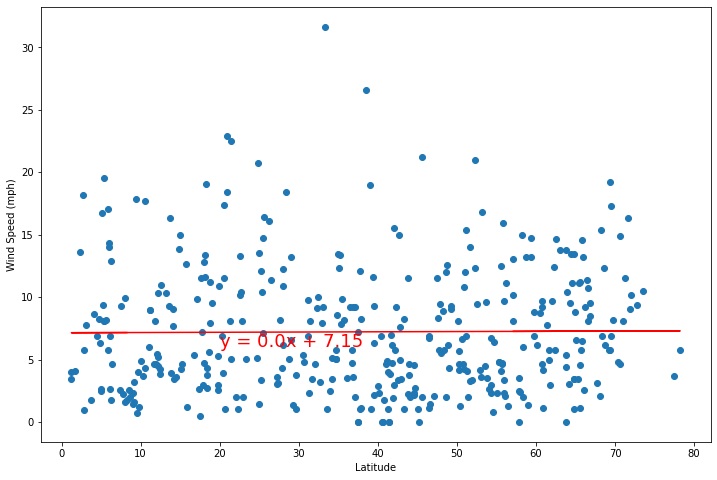

In [53]:
x_values =  feature7
y_values = target7

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [40]:
feature8 = df_southern["Latitude"]
target8 = df_southern["Wind"]

# STATSMODELS
X = sm.add_constant(feature8)
Y = target8
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wind   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.904
Date:                Thu, 12 Aug 2021   Prob (F-statistic):             0.0498
Time:                        23:42:21   Log-Likelihood:                -527.11
No. Observations:                 171   AIC:                             1058.
Df Residuals:                     169   BIC:                             1064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0574      0.767      9.204      0.000       5.544       8.571
Latitude      -0.0587      0.030     -1.976      0.050      -0.117   -4.88e-05
==============================================================================
Omnibus:                       13.847   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.661
Skew:                           0.737   Prob(JB):                     0.000397
Kurtosis:                       2.850   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

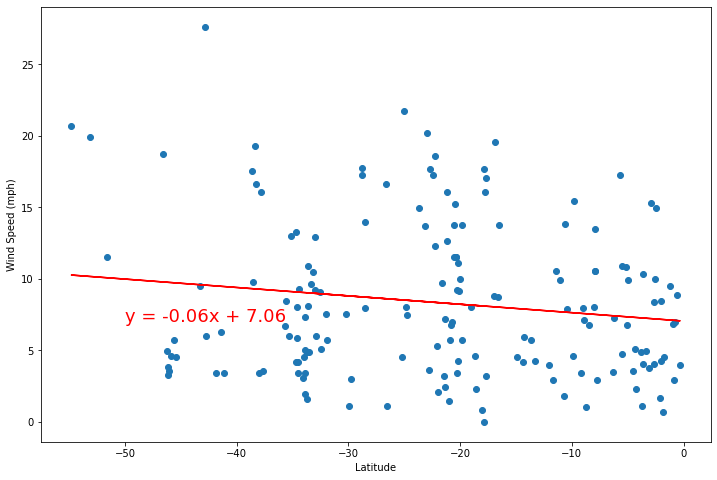

In [56]:
x_values =  feature8
y_values = target8

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (12,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,7),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()